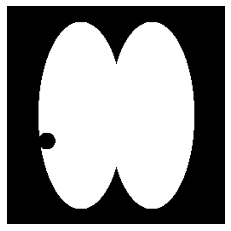

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.draw import ellipse

# Create a blank white image
width, height = 256, 256
image = np.zeros((height, width), dtype=np.uint8)

x = 110
y = 50
d = y / 1.2 # 1.1 - 1.2

# Define the center and axes for the ellipse
center1 = (256 / 2, 256 / 2 + d)  # (row, col)
center2 = (256 / 2, 256 / 2 - d)  # (row, col)
axis_lengths = (x, y)  # (vertical axis, horizontal axis) 90-110, 50-70

# Draw the ellipse
rr, cc = ellipse(center1[0], center1[1], axis_lengths[0], axis_lengths[1], shape=image.shape)
image[rr, cc] = 255  # Black color for the ellipse
rr, cc = ellipse(center2[0], center2[1], axis_lengths[0], axis_lengths[1], shape=image.shape)
image[rr, cc] = 255  # Black color for the ellipse

rr, cc = ellipse(center2[0] + 30, center2[1] - 40, 10, 10, shape=image.shape) # size - (10, 10) - (
image[rr, cc] = 0  # Black color for the ellipse

# Display the image using matplotlib
plt.imshow(image, cmap='gray')
plt.axis('off')  # Turn off axis for better visualization
plt.show()

# Optionally, save the image
# plt.imsave('ellipse_skimage.png', image, cmap='gray')


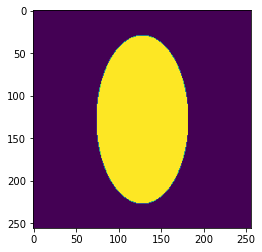

In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np
from skimage.draw import ellipse

def create_artificial_lung(min_r, max_r, min_c, max_c, width=256, height=256):
    img = np.zeros((height, width), dtype=np.uint8)
    r1 = random.randint(min_r, max_r)
    c1 = random.randint(min_c, max_c)
    y1, x1 = height / 2, width / 2
    rr, cc = ellipse(y1, x1, r1, c1, shape=img.shape)
    img[rr, cc] = 255
    return img
    
min_r = 90
max_r = 110
min_c = 50
max_c = 70

plt.imshow(create_artificial_lung(min_r, max_r, min_c, max_c))

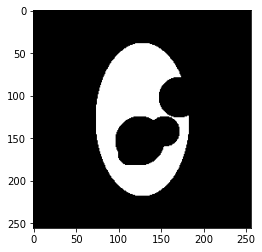

In [3]:
example_img = create_artificial_lung(min_r, max_r, min_c, max_c)

def make_holed_lung(img, min_num_of_holes, max_num_of_holes, min_size, max_size, min_dx, max_dx, min_dy, max_dy, width=256, height=256):
    new_img = img.copy()
    num_of_holes = random.randint(min_num_of_holes, max_num_of_holes)
    for _ in range(num_of_holes):
        size = random.randint(min_size, max_size)
        dx = random.randint(min_dx, max_dx)
        dy = random.randint(min_dy, max_dy)
        y = height / 2 - dy
        x = width / 2 - dx
        rr, cc = ellipse(y, x, size, size, shape=new_img.shape)
        new_img[rr, cc] = 0
    return new_img

img = make_holed_lung(example_img, 1, 4, 10, 40, -60, 60, -60, 60)
plt.gray()
plt.imshow(img)
        

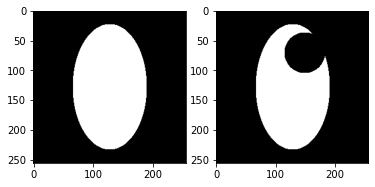

In [4]:
min_r = 90
max_r = 110
min_c = 50
max_c = 70
min_d_coeff = 1.1
max_d_coeff = 1.2
min_num_of_holes = 1
max_num_of_holes = 4
min_size = 10
max_size = 40
min_dx = -60
max_dx = 60
min_dy = -60
max_dy = 60

def create_sample():
    lung = create_artificial_lung(min_r, max_r, min_c, max_c)
    holed_lung = make_holed_lung(lung, min_num_of_holes, max_num_of_holes, min_size, max_size, min_dx, max_dx, min_dy, max_dy)
    return lung, holed_lung

lung, holed_lung = create_sample()

fig, axes = plt.subplots(nrows=1, ncols=2)
axes[0].imshow(lung)
axes[1].imshow(holed_lung)
    

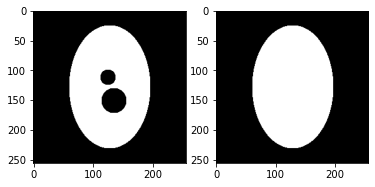

In [5]:
from sklearn.model_selection import train_test_split

data_size = 10000

data = [create_sample() for _ in range(data_size)]
Y = [d[0] for d in data]
X = [d[1] for d in data]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

fix, axes = plt.subplots(nrows=1, ncols=2)

axes[0].imshow(X[0])
axes[1].imshow(Y[0])

In [6]:
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

In [7]:
from torch import nn

class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()

        self.encoder = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(32, 16, kernel_size=3, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(16, 8, kernel_size=3, padding=1),
            nn.BatchNorm2d(8),
            nn.ReLU()
        )

        self.decoder = nn.Sequential(
            nn.Conv2d(8, 16, kernel_size=3, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.Upsample(scale_factor=2),
            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Upsample(scale_factor=2),
            nn.Conv2d(32, 1, kernel_size=3, padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

model = Autoencoder().to(device)
print(model)

Autoencoder(
  (encoder): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(16, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
  )
  (decoder): Sequential(
    (0): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Upsample(scale_factor=2.0, mode='neares

In [8]:
class ResidualBlock(nn.Module):
    def __init__(self, channels):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(channels, channels, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(channels)
        self.relu = nn.ReLU()
        self.conv2 = nn.Conv2d(channels, channels, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(channels)

    def forward(self, x):
        residual = x
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        out += residual  # Add skip connection
        out = self.relu(out)
        return out

class ResidualAutoencoder(nn.Module):
    def __init__(self):
        super(ResidualAutoencoder, self).__init__()
        
        # Encoder layers with residual blocks
        self.enc_conv1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU()
        )
        self.enc_res1 = ResidualBlock(32)
        self.enc_pool1 = nn.MaxPool2d(2, 2)
        
        self.enc_conv2 = nn.Sequential(
            nn.Conv2d(32, 16, kernel_size=3, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU()
        )
        self.enc_res2 = ResidualBlock(16)
        self.enc_pool2 = nn.MaxPool2d(2, 2)
        
        self.enc_conv3 = nn.Sequential(
            nn.Conv2d(16, 8, kernel_size=3, padding=1),
            nn.BatchNorm2d(8),
            nn.ReLU()
        )
        self.enc_res3 = ResidualBlock(8)
        
        # Decoder layers with residual blocks and skip connections
        self.dec_conv1 = nn.Sequential(
            nn.Conv2d(8, 16, kernel_size=3, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU()
        )
        self.dec_res1 = ResidualBlock(16)
        self.dec_up1 = nn.Upsample(scale_factor=2)
        
        self.dec_conv2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU()
        )
        self.dec_res2 = ResidualBlock(32)
        self.dec_up2 = nn.Upsample(scale_factor=2)
        
        self.dec_conv3 = nn.Sequential(
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU()
        )
        self.dec_res3 = ResidualBlock(32)
        
        # Final output layer
        self.final_conv = nn.Sequential(
            nn.Conv2d(32, 1, kernel_size=3, padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        # Encoder path with residual connections
        e1 = self.enc_conv1(x)
        e1 = self.enc_res1(e1)
        p1 = self.enc_pool1(e1)
        
        e2 = self.enc_conv2(p1)
        e2 = self.enc_res2(e2)
        p2 = self.enc_pool2(e2)
        
        e3 = self.enc_conv3(p2)
        e3 = self.enc_res3(e3)
        
        # Decoder path with residual connections and skip connections
        d1 = self.dec_conv1(e3)
        d1 = self.dec_res1(d1)
        u1 = self.dec_up1(d1)
        # Add skip connection from encoder
        u1 = u1 + e2
        
        d2 = self.dec_conv2(u1)
        d2 = self.dec_res2(d2)
        u2 = self.dec_up2(d2)
        # Add skip connection from encoder
        u2 = u2 + e1
        
        d3 = self.dec_conv3(u2)
        d3 = self.dec_res3(d3)
        
        # Final output
        out = self.final_conv(d3)
        
        return out

model = ResidualAutoencoder().to(device)
print(model)

ResidualAutoencoder(
  (enc_conv1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (enc_res1): ResidualBlock(
    (conv1): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
    (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (enc_pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (enc_conv2): Sequential(
    (0): Conv2d(32, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (enc_res2): ResidualBlock(
    (conv1): Conv2d(16, 16, kernel_size=(3, 3),

In [9]:
from typing import List

from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

train_transform = transforms.Compose([
    transforms.RandomResizedCrop(256, scale=(0.8, 1.0)),
    transforms.RandomRotation(30),
    transforms.RandomAffine(degrees=0, translate=(0.3, 0.3))
])

class EllipsesDataset(Dataset):
    def __init__(self, noisy_data: List[np.array], data: List[np.array], transform=None):
        self.noisy_data = [torch.clamp(torch.tensor(nd, dtype=torch.float).unsqueeze(0), max=1.0) for nd in noisy_data]
        self.data = [torch.clamp(torch.tensor(d, dtype=torch.float).unsqueeze(0), max=1.0) for d in data]
        self.transform = transform

    def __len__(self):
        return len(self.noisy_data)

    def __getitem__(self, idx):
        if self.transform is not None:
            state = torch.get_rng_state()
            noisy_img = self.transform(self.noisy_data[idx])
            torch.set_rng_state(state)
            img = self.transform(self.data[idx])
            return noisy_img, img
        else:
            return self.noisy_data[idx], self.data[idx]


train_dataset = EllipsesDataset(X_train, Y_train, transform=train_transform)
test_dataset = EllipsesDataset(X_test, Y_test, transform=train_transform)

# TODO: Add augmentation

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

In [10]:
import os

def train(model, train_loader, criterion, optimizer, save_dir, num_epochs=10, device='cuda'):
    losses = list()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for batch_idx, (noisy_data, data) in enumerate(train_loader):
            noisy_data, data = noisy_data.to(device), data.to(device)
            # Zero the gradients
            optimizer.zero_grad()
            
            # Forward pass
            outputs = model(noisy_data)
            loss = criterion(outputs, data)
            
            # Backward pass and optimize
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            
        epoch_loss = running_loss / len(train_loader)
        losses.append(epoch_loss)
        torch.save(model.state_dict(), f"model_epoch_{epoch + 1}_state_dict.pth")
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}')
    return {
        "loss": losses
    }

In [11]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters())

history = train(model, train_loader, criterion, optimizer, "lab-2", num_epochs=30)

Epoch [1/2], Loss: 0.0413
Epoch [2/2], Loss: 0.0182


In [13]:
import pickle

with open("history.pkl", "wb") as fp:
    pickle.dump(history, fp)

In [14]:
noisy_data, data = next(iter(test_loader))
noisy_data, data = noisy_data.to(device), data.to(device)

outputs = model(noisy_data)

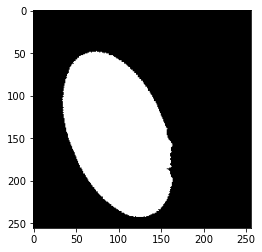

In [15]:
plt.imshow(outputs[2].squeeze().detach().cpu().numpy() > 0.5)

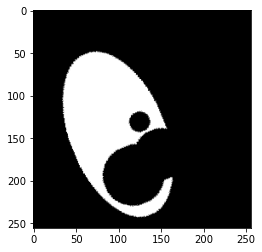

In [16]:
plt.imshow(noisy_data[2].squeeze().detach().cpu().numpy())